# **Question 1:**

# Part 1-1)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import *
from math import *
import numpy as np
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns

In [ ]:
def prob_calc(n,k):
    candidate=[i for i in range(n)];
    num_iterations=10000
    summation=0
    for i in range(num_iterations):
        shuffle(candidate)
        cand_list=[candidate[m] for m in range(0,k)]
        for j in range(k,n):
          if candidate[j]>np.max(cand_list):
                if candidate[j]==n-1:
                    summation+=1
                break
    return summation/num_iterations

Text(30, 0.22319999999999998, 'k=35, p≈0.3732')

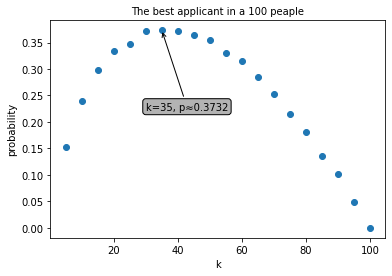

In [ ]:
n=100
prob_array=[prob_calc(n,k) for k in range(5,101,5)]
k=[i for i in range(5,101,5)]
scatter(k,prob_array)
title('The best applicant in a 100 peaple',fontsize=10)
xlabel('k',fontsize=10)
ylabel('probability',fontsize=10)
p_max_index=prob_array.index(max(prob_array))
bbox = dict(boxstyle ="round", fc ="0.7")
arrowprops = dict(arrowstyle = "->")
annotate(f'k={k[p_max_index]}, p≈{max(prob_array)}',xy=(k[p_max_index],
             max(prob_array)),xytext=(k[p_max_index]-5,max(prob_array)-0.15),
             bbox = bbox, arrowprops = arrowprops)

# Part 1-2)

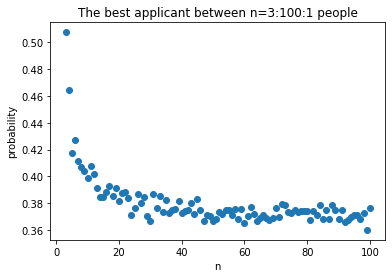

In [ ]:
prob_array=[prob_calc(n,int(n/exp(1))) for n in range(3,101)]
n=[i for i in range(3,101)]
scatter(n,prob_array)
title('The best applicant between n=3:100:1 people')
xlabel('n')
ylabel('probability')
p_max_index=prob_array.index(max(prob_array))

# Part 2)
Loading the given Distribution function:

In [1]:
def Distribution(stdNum):
    np.random.seed(1)
    popSize = 1000 

    a1 = stdNum - int(stdNum / 10) * 10
    a2 = int((stdNum - int(stdNum / 100) * 100)/10)
    a3 = int(stdNum / 100)

    
    mu1, sigma1 = a1/2, np.abs(0.5 + 3*a2/10)
    mu2, sigma2 = -1 * a2/2, np.abs(1 + 3*a3/10)
    mu3, sigma3 = a3/2, np.abs(2 + 3*a1/10)


    distributions = [
    {"type": np.random.normal, "kwargs": {"loc": mu1, "scale": sigma1}},
    {"type": np.random.normal, "kwargs": {"loc": mu2, "scale": sigma2}},
    {"type": np.random.normal, "kwargs": {"loc": mu3, "scale": sigma3}},
    ]
    coefficients = np.array([0.4, 0.25, 0.35])
    coefficients /= coefficients.sum()
    popSize = 100000


    num_distr = len(distributions)
    data = np.zeros((popSize, num_distr))
    for idx, distr in enumerate(distributions):
        data[:, idx] = distr["type"](size=(popSize,), **distr["kwargs"])
    random_idx = np.random.choice(np.arange(num_distr), size=(popSize,), p=coefficients)
    Population = data[np.arange(popSize), random_idx]

    return Population


Generating a population according to the last 3 digits of my student number:

In [32]:
population = Distribution(356)

Defining a function for calculating the mean of a sample from the entire population:

In [10]:
def mean_calc(no_of_samples, no_of_means, population):
    mean = []
    for i in range(no_of_means):        
        new_sample = np.random.choice(population, size = no_of_samples)
        new_mean=new_sample.mean()
        mean.append(new_mean)
    return mean

In [11]:
n = 200
new_mean = mean_calc(n, 1, population)
print('mean of a random sample size of arbitrary size = ', new_mean)

mean of a random sample size of arbitrary size =  [0.7514060748105742]


Now calculating N different means for different samples with the same size:

N = 2000

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

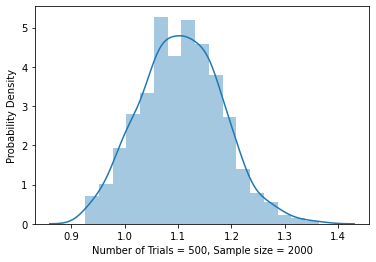

In [30]:
mean_2000 = mean_calc(2000, 500, population)
sns.distplot(mean_2000)
plt.xlabel('Number of Trials = 500, Sample size = 2000')
plt.ylabel('Probability Density')

N = 200:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

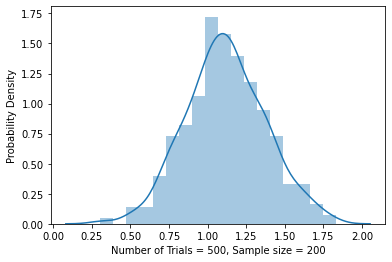

In [16]:
mean_200 = mean_calc(200, 500, population)
sns.distplot(mean_200)
plt.xlabel('Number of Trials = 500, Sample size = 200')
plt.ylabel('Probability Density')

N = 20:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

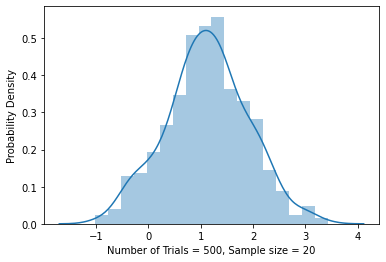

In [33]:
mean_20 = mean_calc(20, 500, population)
sns.distplot(mean_20)
plt.xlabel('Number of Trials = 500, Sample size = 20')
plt.ylabel('Probability Density')

N = 2:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

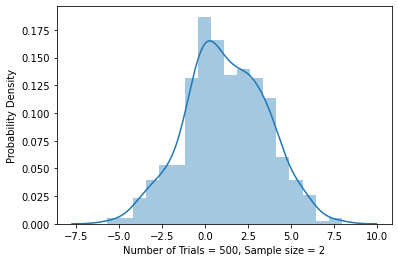

In [19]:
mean_2 = mean_calc(2, 500, population)
sns.distplot(mean_2)
plt.xlabel('Number of Trials = 500, Sample size = 2')
plt.ylabel('Probability Density')

Loading the wine.csv dataset and finding the 12th column in it:

In [22]:
from google.colab import drive
drive.mount('/content/drive')
dataset= pd.read_csv('/content/drive/MyDrive/wine.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


col Mean =  2.6116853932584267


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

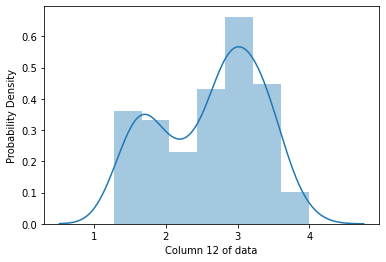

In [24]:
col = dataset['12']
col = np.array(col)
print("col Mean = ", col.mean())
sns.distplot(col)
plt.xlabel('Column 12 of data')
plt.ylabel('Probability Density')

In [35]:
col = dataset['12']
print(len(col))

178


N = 30:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

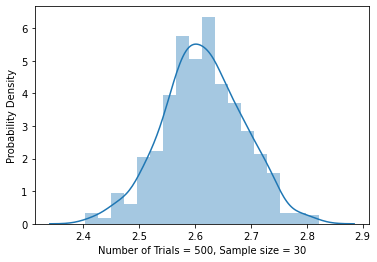

In [40]:
mean_30 = mean_calc(100, 500, col)
sns.distplot(mean_30)
plt.xlabel('Number of Trials = 500, Sample size = 30')
plt.ylabel('Probability Density')

N = 50:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

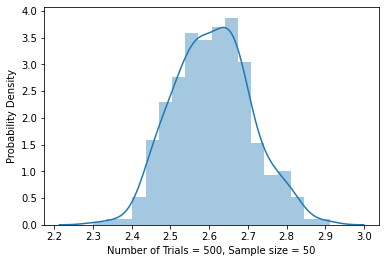

In [38]:
mean_50 = mean_calc(50, 500, col)
sns.distplot(mean_50)
plt.xlabel('Number of Trials = 500, Sample size = 50')
plt.ylabel('Probability Density')

N = 2:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

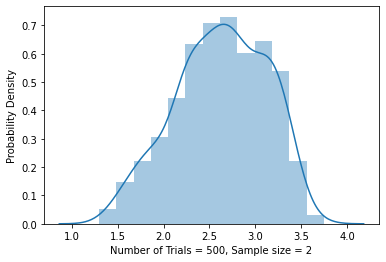

In [42]:
mean_2 = mean_calc(2, 500, col)
sns.distplot(mean_2)
plt.xlabel('Number of Trials = 500, Sample size = 2')
plt.ylabel('Probability Density')

Defining a function to calculate the distribution according to the central limit distribution:

In [45]:
def clt_normal_distribution(population, no_of_samples):
  new_sample = np.random.choice(population, size = no_of_samples)
  mu = new_sample.mean()
  sigma = (new_sample.std())/(no_of_samples ** 0.5)
  s = np.random.normal(mu, sigma, no_of_samples)
  count, bins, ignored = plt.hist(s, 30, density=True)
  plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
  plt.show()

Comparing the previous results with the new normal distributions for data from the column 12 of the dataset:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


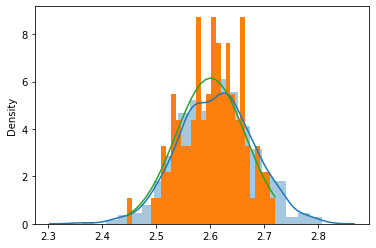

In [51]:
mean_100 = mean_calc(100, 500, col)
sns.distplot(mean_100)
clt_normal_distribution(col, 100)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


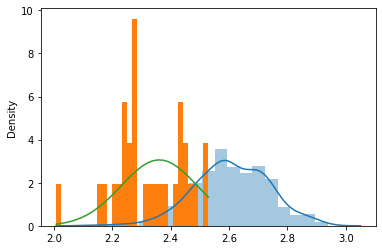

In [48]:
mean_30 = mean_calc(30, 500, col)
sns.distplot(mean_30)
clt_normal_distribution(col, 30)

Comparing the previous results with the new normal distributions for data from the Distribution function:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


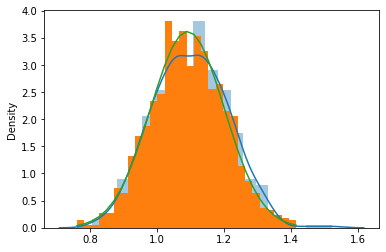

In [52]:
mean_1000 = mean_calc(1000, 500, population)
sns.distplot(mean_1000)
clt_normal_distribution(population, 1000)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


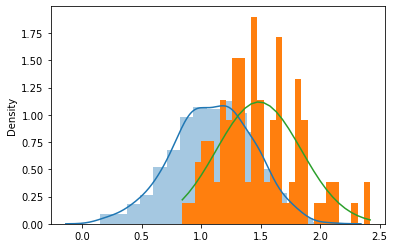

In [53]:
mean_100 = mean_calc(100, 500, population)
sns.distplot(mean_100)
clt_normal_distribution(population, 100)

As it can be seen in both cases, by increasing the number of samples, the distribution becomes more like the distribution from the clt theorem, which is a normal distribution with a mean equal to the mean of the sample set, and a standard deviation equal to the std/(n^0.5).